# CoxTime

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder

import torch
import torchtuples as tt

from pycox.datasets import metabric
from pycox.models import CoxTime
from pycox.models import CoxCC
from pycox.models.cox_time import MLPVanillaCoxTime
from pycox.evaluation import EvalSurv

In [181]:
df_train = pd.read_excel("SimData_WList_Ver2.0.xls", index_col = False, header=0)

In [182]:
df_train

,Gender,Bloodtype,Inpt_attx,Age,BMI,MELD,MELDNA,Time,Cens
0,Female,A,home,42.980695,24.281426,11.328118,8.490318,6905.806322,0
1,Male,O,inpt,43.194412,30.097404,15.295122,20.956402,4583.035351,0
2,Male,A,home,44.952546,30.445467,20.222330,28.063602,2434.090766,0
3,Male,B,home,48.929001,22.588535,16.742302,19.049439,946.529267,0
4,Male,B,home,52.098949,18.317275,19.038291,21.116394,1606.310627,0
...,...,...,...,...,...,...,...,...,...
4995,Male,O,home,61.664413,31.271787,18.259893,21.114819,1790.328790,0
4996,Male,O,home,75.972972,32.058615,20.185605,18.230574,115.020774,0
4997,Female,O,home,46.186842,29.661992,16.680831,25.907240,798.960205,1
4998,Male,O,home,51.977156,18.661174,16.390241,25.747759,5284.059611,0


In [183]:
for i in range(len(df_train["Cens"])):
    if df_train["Cens"][i] == 1:
        if df_train.iloc[i,7] >= 12000:
            print(df_train.iloc[i])
            #print(i)
            

In [184]:
df_train.iloc[3681]

Gender               Male
Bloodtype               A
Inpt_attx            home
Age             47.285801
BMI             29.470271
MELD             14.74246
MELDNA          13.915993
Time         21558.498266
Cens                    0
Name: 3681, dtype: object

In [185]:
le = LabelEncoder()
df_train["Gender"] = le.fit_transform(df_train["Gender"])
df_train["Bloodtype"] = le.fit_transform(df_train["Bloodtype"])
#df_train["Donor_Bloodtype"] = le.fit_transform(df_train["Donor_Bloodtype"])
df_train["Inpt_attx"] = le.fit_transform(df_train["Inpt_attx"])
#df_train["Donor_Sex"] = le.fit_transform(df_train["Donor_Sex"])
#df_train["Donor_DCD"] = le.fit_transform(df_train["Donor_DCD"])

In [186]:
df_train

,Gender,Bloodtype,Inpt_attx,Age,BMI,MELD,MELDNA,Time,Cens
0,0,0,0,42.980695,24.281426,11.328118,8.490318,6905.806322,0
1,1,3,2,43.194412,30.097404,15.295122,20.956402,4583.035351,0
2,1,0,0,44.952546,30.445467,20.222330,28.063602,2434.090766,0
3,1,2,0,48.929001,22.588535,16.742302,19.049439,946.529267,0
4,1,2,0,52.098949,18.317275,19.038291,21.116394,1606.310627,0
...,...,...,...,...,...,...,...,...,...
4995,1,3,0,61.664413,31.271787,18.259893,21.114819,1790.328790,0
4996,1,3,0,75.972972,32.058615,20.185605,18.230574,115.020774,0
4997,0,3,0,46.186842,29.661992,16.680831,25.907240,798.960205,1
4998,1,3,0,51.977156,18.661174,16.390241,25.747759,5284.059611,0


In [187]:
df_test = df_train.sample(frac=0.2)
df_train = df_train.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

In [188]:
#X_train = df_train.drop(['Donor_Sex', 'Gender', 'Donor_DCD', 'Donor_BMI', 'Donor_Age', 'MELDNA'], axis=1)
X_train = df_train.drop(['Gender','Age', 'Bloodtype','BMI'], axis=1)

In [189]:
#X_test = df_test.drop(['Donor_Sex', 'Gender', 'Donor_DCD', 'Donor_BMI', 'Donor_Age'], axis=1)
X_test = df_test.drop(['Gender','Age', 'Bloodtype','BMI'], axis=1)
X_val = df_val.drop(['Gender','Age', 'Bloodtype','BMI'], axis=1)

In [190]:
X_val

,Inpt_attx,MELD,MELDNA,Time,Cens
1125,2,14.174382,18.839173,76.617109,1
1678,2,20.371323,23.622123,2854.034542,1
1663,2,22.361418,26.698074,1718.037620,0
119,0,9.881367,9.879184,362.624798,0
2684,0,10.379035,10.379059,1845.664581,0
...,...,...,...,...,...
4728,0,15.945732,9.075551,470.475840,0
2156,0,9.929706,9.930750,318.869061,0
1293,0,17.439291,18.193918,1879.005442,0
1829,0,15.226545,16.042665,265.555165,0


In [193]:
#cols_standardize = ['Waittime', 'Age_Tx', 'TransplantBMI', 'MELD', 'MELDNA']
cols_standardize = ['MELDNA', 'MELD']
#cols_leave = ['Bloodtype', 'Inpt_attx', 'Donor_Bloodtype']
cols_leave = ['Inpt_attx']
standardize = [([col], StandardScaler()) for col in cols_standardize]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)

In [194]:
x_train = x_mapper.fit_transform(X_train).astype('float32')
x_val = x_mapper.transform(X_val).astype('float32')
x_test = x_mapper.transform(X_test).astype('float32')

In [195]:
x_train[0]

array([-1.1069834, -0.7757989,  0.       ], dtype=float32)

In [196]:
x_train

array([[-1.1069834 , -0.7757989 ,  0.        ],
       [ 0.22477749, -0.32367024,  2.        ],
       [ 0.9840449 ,  0.23789501,  0.        ],
       ...,
       [ 0.75367916, -0.16573782,  0.        ],
       [ 0.7366417 , -0.19885708,  0.        ],
       [-0.9529099 , -0.64919055,  0.        ]], dtype=float32)

In [197]:
df_test

,Gender,Bloodtype,Inpt_attx,Age,BMI,MELD,MELDNA,Time,Cens
864,1,3,0,61.437204,18.251839,25.723724,29.424989,52.052455,1
4151,0,2,0,54.570974,17.914469,8.937821,18.936872,469.544809,1
2384,1,3,2,62.620602,28.204968,37.468279,37.935046,2066.391721,0
1585,1,0,0,56.239650,19.773477,15.983376,13.605044,6218.604175,0
773,1,3,0,47.778741,33.976053,12.337081,14.172209,1921.338455,0
...,...,...,...,...,...,...,...,...,...
1949,1,3,2,43.920326,22.854491,23.857036,24.383732,2488.693006,0
4129,0,3,1,52.979506,23.716542,15.099622,17.571599,158.988517,0
345,1,2,0,57.051098,25.530961,22.642327,26.097565,4538.957001,0
46,0,3,0,62.642025,31.695732,8.364508,8.362755,49.869417,0


In [198]:
Time_test

array([8.52536739e+02, 1.42337473e+03, 2.13939593e+03, 3.80535250e+03,
       7.82431937e+02, 7.19288809e+03, 3.93134763e+02, 2.68755633e+03,
       2.89959259e+03, 2.21744453e+03, 1.83709552e+03, 1.64995327e+03,
       1.01348035e+03, 2.12504185e+00, 5.30336991e+03, 4.12088283e+02,
       1.02208063e+03, 8.35244458e+03, 1.05616920e+02, 9.06749759e+02,
       6.79229382e+02, 1.67164572e+03, 7.48462678e+03, 1.51645366e+02,
       6.52739353e+02, 2.29872082e+03, 1.01048776e+04, 5.24152775e+02,
       3.18914815e+03, 2.52885935e+03, 2.48080054e+02, 4.12139675e+02,
       9.24817345e+02, 1.52812025e+03, 7.79577501e+03, 1.10021135e+03,
       2.94164853e+03, 1.39939919e+03, 1.56873014e+03, 1.51719915e+03,
       2.43931149e+03, 6.51320580e+03, 3.36427820e+03, 2.04102325e+03,
       3.03243854e+03, 9.16857456e+02, 5.41348473e+03, 3.36320961e+03,
       1.16153403e+03, 3.58199106e+03, 4.64104784e+03, 6.28465211e+02,
       7.00544056e+02, 1.18452277e+03, 2.47542338e+02, 6.07338996e+02,
      

In [199]:
Cens_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [200]:
labtrans = CoxTime.label_transform()
get_target = lambda df: (df['Time'].values, df['Cens'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))
Time_test, Cens_test = get_target(df_test)
val = tt.tuplefy(x_val, y_val)

In [201]:
val.shapes()

((800, 3), ((800,), (800,)))

In [202]:
x_train[0]

array([-1.1069834, -0.7757989,  0.       ], dtype=float32)

# Neural net
We create a simple MLP with two hidden layers, ReLU activations, batch norm and dropout. The net required by CoxTime is slightly different than most of the other methods as it also take time and an additional input argument. We have therefore crated the MLPVanillaCoxTime class that is a suitable version of tt.practical.MLPVanilla. This class also removes the options for setting out_features and output_bias as they should be 1 and False, respectively.

In [203]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
batch_norm = True
dropout = 0.1
net = MLPVanillaCoxTime(in_features, num_nodes, batch_norm, dropout)

# Training the model
To train the model we need to define an optimizer. You can choose any torch.optim optimizer, but here we instead use one from tt.optim as it has some added functionality. We use the Adam optimizer, but instead of choosing a learning rate, we will use the scheme proposed by Smith 2017 to find a suitable learning rate with model.lr_finder. See this post for an explanation.

We also set labtrans which connects the output nodes of the network the the label transform of the durations. This is only useful for prediction and does not affect the training procedure.

In [204]:
model = CoxTime(net, tt.optim.Adam, labtrans=labtrans)

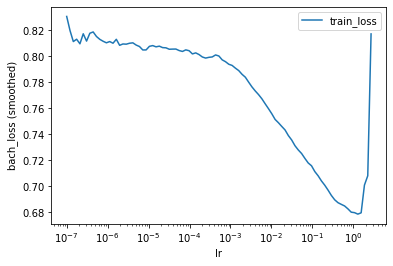

In [205]:
batch_size = 256
lrfinder = model.lr_finder(x_train, y_train, batch_size, tolerance=2)
_ = lrfinder.plot()

In [206]:
lrfinder.get_best_lr()

0.12915496650148922

The learning rate is high in general case, so we decrease it to 0.01

In [207]:
model.optimizer.set_lr(0.01)

In [208]:
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

In [209]:
%%time
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val.repeat(10).cat())

0:	[0s / 0s],		train_loss: 0.8065,	val_loss: 0.6362
1:	[0s / 0s],		train_loss: 0.6299,	val_loss: 0.5659
2:	[0s / 0s],		train_loss: 0.6000,	val_loss: 0.5617
3:	[0s / 0s],		train_loss: 0.6156,	val_loss: 0.5592
4:	[0s / 0s],		train_loss: 0.6077,	val_loss: 0.5622
5:	[0s / 0s],		train_loss: 0.6000,	val_loss: 0.5584
6:	[0s / 0s],		train_loss: 0.5877,	val_loss: 0.5407
7:	[0s / 0s],		train_loss: 0.5655,	val_loss: 0.5440
8:	[0s / 0s],		train_loss: 0.5880,	val_loss: 0.5497
9:	[0s / 0s],		train_loss: 0.5830,	val_loss: 0.5235
10:	[0s / 0s],		train_loss: 0.5459,	val_loss: 0.5391
11:	[0s / 0s],		train_loss: 0.6179,	val_loss: 0.5300
12:	[0s / 0s],		train_loss: 0.5575,	val_loss: 0.5197
13:	[0s / 0s],		train_loss: 0.5466,	val_loss: 0.5233
14:	[0s / 0s],		train_loss: 0.5738,	val_loss: 0.5278
15:	[0s / 0s],		train_loss: 0.5635,	val_loss: 0.5244
16:	[0s / 0s],		train_loss: 0.5541,	val_loss: 0.5275
17:	[0s / 0s],		train_loss: 0.5319,	val_loss: 0.5082
18:	[0s / 0s],		train_loss: 0.5368,	val_loss: 0.4941
19:

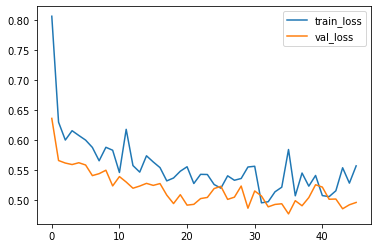

In [210]:
_ = log.plot()

In [211]:
model.partial_log_likelihood(*val).mean() #partial log-likelihood

-5.702365398406982

# Prediction
For evaluation we first need to obtain survival estimates for the test set. This can be done with model.predict_surv which returns an array of survival estimates, or with model.predict_surv_df which returns the survival estimates as a dataframe.

However, as Cox-Time is semi-parametric, we first need to get the non-parametric baseline hazard estimates with compute_baseline_hazards.

Note that for large datasets the sample argument can be used to estimate the baseline hazard on a subset.

In [212]:
_ = model.compute_baseline_hazards()
surv = model.predict_surv_df(x_test)

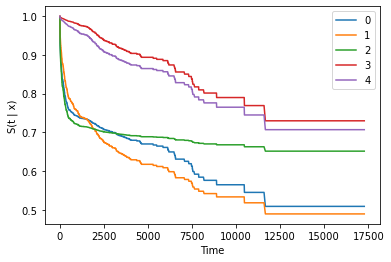

In [213]:
surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

# Evaluation
We can use the EvalSurv class for evaluation the concordance, brier score and binomial log-likelihood. Setting censor_surv='km' means that we estimate the censoring distribution by Kaplan-Meier on the test set.

In [214]:
ev = EvalSurv(surv, Time_test, Cens_test, censor_surv='km')

Measure of goodness of fit for binary outcomes in a logistic regression model.  
A value below 0.5 indicates a very poor model.  
A value of 0.5 means that the model is no better than predicting an outcome than random chance.  
Values over 0.7 indicate a good model.

In [215]:
ev.concordance_td()

0.7364173720725109

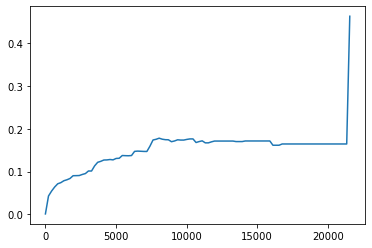

In [216]:
time_grid = np.linspace(Time_test.min(), Time_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

 The Brier score is used to evaluate the accuracy of a predicted survival function at a given time t

In [217]:
ev.integrated_brier_score(time_grid) #brier_score

0.14970319539942803

In [218]:
ev.integrated_nbll(time_grid) #binomial log-likelihood

0.47158404325918396

In [153]:
surv

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0.008729,0.999460,0.999888,0.999321,0.999324,0.999481,0.999638,0.999708,0.999891,0.999378,0.999889,...,0.999877,0.999862,0.999752,0.999870,0.999586,0.999665,0.999497,0.999733,0.999891,0.999873
0.074263,0.998921,0.999777,0.998642,0.998648,0.998963,0.999276,0.999416,0.999782,0.998757,0.999778,...,0.999755,0.999724,0.999503,0.999741,0.999173,0.999330,0.998995,0.999467,0.999781,0.999747
0.110364,0.998381,0.999665,0.997964,0.997972,0.998445,0.998914,0.999124,0.999673,0.998136,0.999666,...,0.999632,0.999586,0.999255,0.999611,0.998759,0.998995,0.998492,0.999200,0.999672,0.999620
0.115724,0.997842,0.999554,0.997285,0.997297,0.997926,0.998552,0.998832,0.999563,0.997515,0.999555,...,0.999509,0.999448,0.999006,0.999482,0.998346,0.998659,0.997990,0.998933,0.999563,0.999493
0.137942,0.997302,0.999442,0.996606,0.996620,0.997407,0.998189,0.998539,0.999454,0.996893,0.999444,...,0.999387,0.999310,0.998757,0.999352,0.997932,0.998324,0.997487,0.998666,0.999453,0.999366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15538.155283,0.702380,0.703462,0.663788,0.644188,0.733292,0.759699,0.653972,0.673791,0.702280,0.743049,...,0.737867,0.769853,0.842168,0.654559,0.676958,0.547271,0.725342,0.599871,0.707804,0.800930
15696.756835,0.702380,0.703462,0.663788,0.644188,0.733292,0.759699,0.653972,0.673791,0.702280,0.743049,...,0.737867,0.769853,0.842168,0.654559,0.676958,0.547271,0.725342,0.599871,0.707804,0.800930
16098.609321,0.702380,0.703462,0.663788,0.644188,0.733292,0.759699,0.653972,0.673791,0.702280,0.743049,...,0.737867,0.769853,0.842168,0.654559,0.676958,0.547271,0.725342,0.599871,0.707804,0.800930
16763.724360,0.702380,0.703462,0.663788,0.644188,0.733292,0.759699,0.653972,0.673791,0.702280,0.743049,...,0.737867,0.769853,0.842168,0.654559,0.676958,0.547271,0.725342,0.599871,0.707804,0.800930


In [60]:
surv.iloc[567,:]

0      0.938985
1      0.937830
2      0.957743
3      0.852489
4      0.912200
         ...   
995    0.916984
996    0.949707
997    0.968320
998    0.945829
999    0.921837
Name: 300.15369503967105, Length: 1000, dtype: float64

In [36]:
x_test

array([[ 0.9505529 ,  0.03662485, -0.09702433,  0.        ],
       [-0.23074597, -1.461181  , -0.02102511,  0.        ],
       [ 0.12528017,  0.63849497, -0.86604565,  0.        ],
       ...,
       [ 0.22202098, -0.7627187 , -1.2518739 ,  0.        ],
       [ 1.2909907 ,  0.21550195, -0.8495002 ,  2.        ],
       [ 2.2218115 ,  1.4084529 ,  0.61786556,  0.        ]],
      dtype=float32)

In [168]:
import copy
df_train = pd.read_excel("SimData_WList_Ver2.0.xls", index_col = False, header=0)
le = LabelEncoder()
df_train["Gender"] = le.fit_transform(df_train["Gender"])
df_train["Bloodtype"] = le.fit_transform(df_train["Bloodtype"])
#df_train["Donor_Bloodtype"] = le.fit_transform(df_train["Donor_Bloodtype"])
df_train["Inpt_attx"] = le.fit_transform(df_train["Inpt_attx"])
#df_train["Donor_Sex"] = le.fit_transform(df_train["Donor_Sex"])
#df_train["Donor_DCD"] = le.fit_transform(df_train["Donor_DCD"])
feature_df_train = copy.deepcopy(df_train)

In [169]:
y_time = feature_df_train['Time']
y_cens = feature_df_train['Cens']
feature_df_train = df_train.drop(['Time', 'Cens'], axis=1)

In [170]:
feature_df_train

,Gender,Bloodtype,Inpt_attx,Age,BMI,MELD,MELDNA
0,0,0,0,42.980695,24.281426,11.328118,8.490318
1,1,3,2,43.194412,30.097404,15.295122,20.956402
2,1,0,0,44.952546,30.445467,20.222330,28.063602
3,1,2,0,48.929001,22.588535,16.742302,19.049439
4,1,2,0,52.098949,18.317275,19.038291,21.116394
...,...,...,...,...,...,...,...
4995,1,3,0,61.664413,31.271787,18.259893,21.114819
4996,1,3,0,75.972972,32.058615,20.185605,18.230574
4997,0,3,0,46.186842,29.661992,16.680831,25.907240
4998,1,3,0,51.977156,18.661174,16.390241,25.747759


In [171]:
mytype=np.dtype([('Status', '?'), ('Survival_in_days', '<f8')])
data_y = np.zeros(5000,dtype=mytype)
for i in range(len(y_time)):
    data_y[i][0] = y_cens[i]
    data_y[i][1] = y_time[i]
data_y


array([(False, 6905.80632199), (False, 4583.03535097),
       (False, 2434.09076562), ..., ( True,  798.96020549),
       (False, 5284.05961066), (False, 1296.42344833)],
      dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

In [172]:
import numpy as np
from sksurv.metrics import concordance_index_censored
from sksurv.nonparametric import kaplan_meier_estimator
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis
set_config(display="text")  # displays text representation of estimators

estimator = CoxPHSurvivalAnalysis()
estimator.fit(feature_df_train, data_y)

CoxPHSurvivalAnalysis()

In [173]:
pd.Series(estimator.coef_, index=feature_df_train.columns)

Gender      -0.045703
Bloodtype    0.048908
Inpt_attx    0.016669
Age          0.009284
BMI         -0.006228
MELD        -0.083442
MELDNA       0.145586
dtype: float64

In [174]:
from sksurv.metrics import concordance_index_censored # c index

prediction = estimator.predict(feature_df_train)
result = concordance_index_censored(data_y["Status"], data_y["Survival_in_days"], prediction)
result[0]

0.743402856021342

In [175]:
def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

scores = fit_and_score_features(feature_df_train.values, data_y)
pd.Series(scores, index=feature_df_train.columns).sort_values(ascending=False)

MELDNA       0.735142
MELD         0.697335
Inpt_attx    0.604430
Gender       0.535016
Bloodtype    0.513241
Age          0.504986
BMI          0.499358
dtype: float64

In [219]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

pipe = Pipeline([('select', SelectKBest(fit_and_score_features, k=3)),
                 ('model', CoxPHSurvivalAnalysis())])

from sklearn.model_selection import GridSearchCV, KFold

param_grid = {'select__k': np.arange(1, feature_df_train.shape[1] + 1)}
cv = KFold(n_splits=3, random_state=1, shuffle=True)
gcv = GridSearchCV(pipe, param_grid, return_train_score=True, cv=cv)
gcv.fit(feature_df_train, data_y)

results = pd.DataFrame(gcv.cv_results_).sort_values(by='mean_test_score', ascending=False)
results.loc[:, ~results.columns.str.endswith("_time")]

,param_select__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,2,{'select__k': 2},0.743340,0.697401,0.769781,0.736841,0.029904,1,0.736169,0.759337,0.724316,0.739941,0.014544
4,5,{'select__k': 5},0.742039,0.700602,0.767366,0.736669,0.027519,2,0.739164,0.759475,0.726836,0.741825,0.013457
2,3,{'select__k': 3},0.743463,0.697122,0.769180,0.736588,0.029817,3,0.736148,0.759381,0.724392,0.739974,0.014538
3,4,{'select__k': 4},0.743364,0.696991,0.769222,0.736526,0.029882,4,0.736441,0.759407,0.724383,0.740077,0.014528
5,6,{'select__k': 6},0.741571,0.698105,0.767169,0.735615,0.028508,5,0.739049,0.762434,0.726826,0.742770,0.014773
6,7,{'select__k': 7},0.738846,0.697036,0.768209,0.734697,0.029204,6,0.743160,0.763001,0.727000,0.744387,0.014723
0,1,{'select__k': 1},0.745010,0.694272,0.759461,0.732914,0.027954,7,0.729835,0.752784,0.721210,0.734609,0.013325
